In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def compare_curve(rpt_file_path, excel_file_path, plot_title):
    # Reading the .rpt file with latin-1 encoding
    with open(rpt_file_path, 'r', encoding='latin-1') as file:
        rpt_content = file.readlines()

    # Parse the numeric data from the .rpt file
    rpt_data = []
    for line in rpt_content:
        if line.strip() and not line.startswith(('X', 'Displacement', 'Force')):
            values = line.split()
            if len(values) == 3:
                try:
                    displacement = float(values[1])
                    force = float(values[2])
                    rpt_data.append([displacement, force])
                except ValueError:
                    continue

    rpt_data = np.array(rpt_data)

    # Convert the .rpt file force values from N to kN
    rpt_data_converted = rpt_data.copy()
    rpt_data_converted[:, 1] = rpt_data[:, 1] / 1000  # Convert N to kN

    # Load the Excel data
    excel_df = pd.read_excel(excel_file_path)

    # Extract relevant columns from the Excel file
    displacement_col_excel = excel_df.columns[0]  # First column for displacement
    force_col_excel = excel_df.columns[1]         # Second column for force

    displacement_data_excel = excel_df[displacement_col_excel]
    force_data_excel = excel_df[force_col_excel]

    # Plot both datasets in kilonewtons (kN)
    plt.figure(figsize=(8, 6))

    # Plot the .rpt data (converted to kN)
    plt.plot(rpt_data_converted[:, 0], rpt_data_converted[:, 1], label="Simulated data (converted to kN)", color='b')

    # Plot the Excel data (already in kN)
    plt.scatter(displacement_data_excel[::10], force_data_excel[::10], label="Experimental data", color='r')

    max_displacement = min(rpt_data_converted[:, 0].max(), displacement_data_excel.max())

    # Labels and title
    plt.title(plot_title)
    plt.xlabel("Displacement (mm)")
    plt.ylabel("Force (kN)")
    plt.grid(True)
    plt.legend()
    plt.xlim(left=0, right=max_displacement)
    plt.ylim(bottom=0)

    # Show the combined plot
    plt.show()

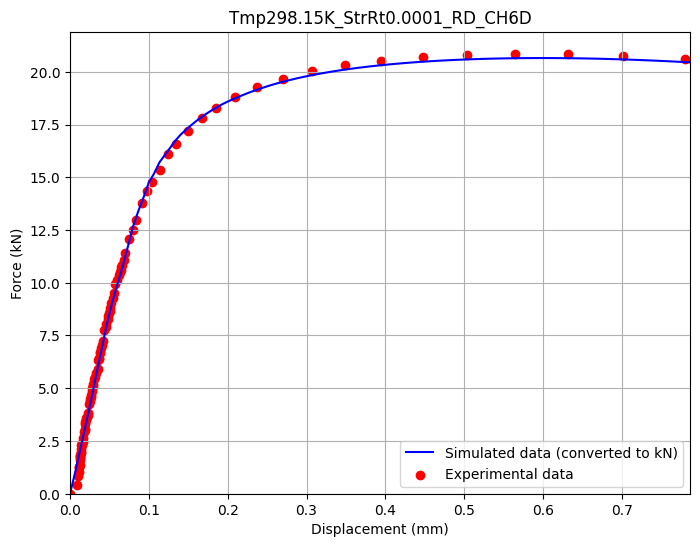

In [3]:
# CH6
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/RD_CH6hw.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/Tmp298.15K_RD_CH6D.xlsx", "Tmp298.15K_StrRt0.0001_RD_CH6D")

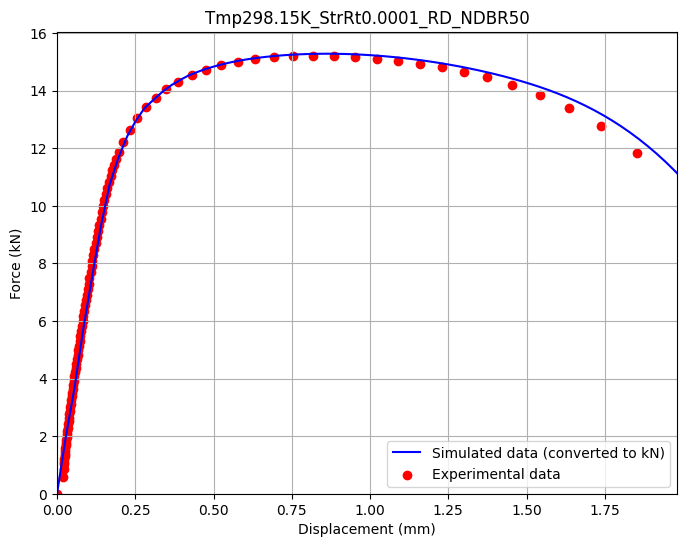

In [4]:
#NDBR50
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/RD_NDBR50f.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/Tmp298.15K_RD_NDBR50.xlsx", "Tmp298.15K_StrRt0.0001_RD_NDBR50")

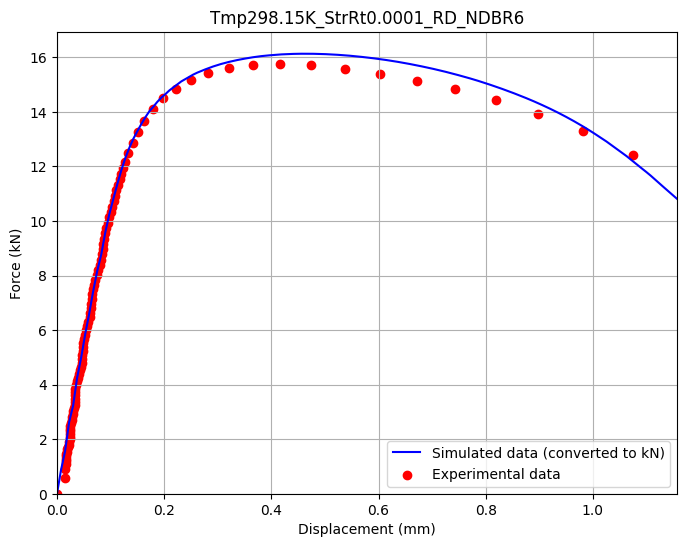

In [5]:
#NDBR6
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/RD_NDBR6.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/Tmp298.15K_StrRt0.0001_RD_NDBR6.xlsx", "Tmp298.15K_StrRt0.0001_RD_NDBR6")

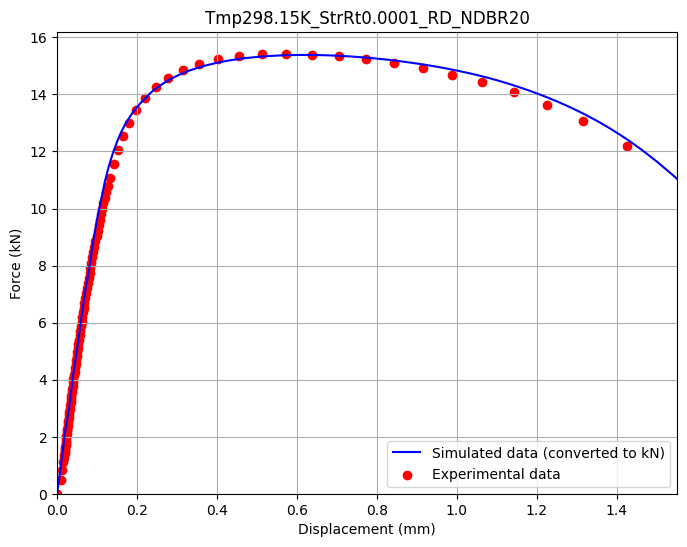

In [6]:
#NDBR20
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/RD_NDBR20r.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/Tmp298.15K_StrRt0.0001_RD_NDBR20.xlsx", "Tmp298.15K_StrRt0.0001_RD_NDBR20")

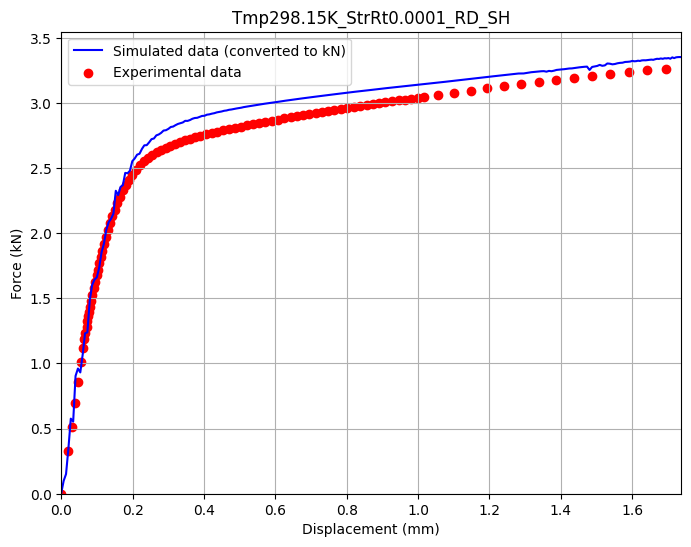

In [7]:
#sh
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/RD_sh.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.0001_RD/Tmp298.15K_StrRt0.0001_RD_SH.xlsx", "Tmp298.15K_StrRt0.0001_RD_SH")

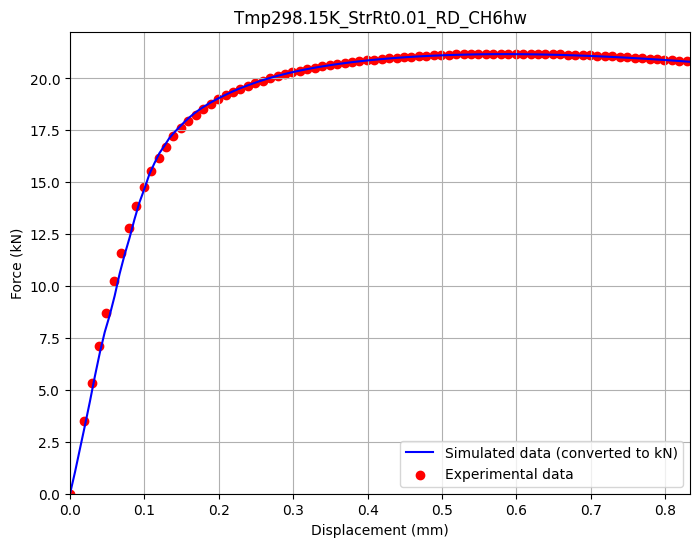

In [8]:
#Tmp298.15K_StrRt0.01
# CH6hw
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/RD_CH6hw.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/Tmp298.15K_StrRt0.01_RD_CHD6.xlsx", "Tmp298.15K_StrRt0.01_RD_CH6hw")

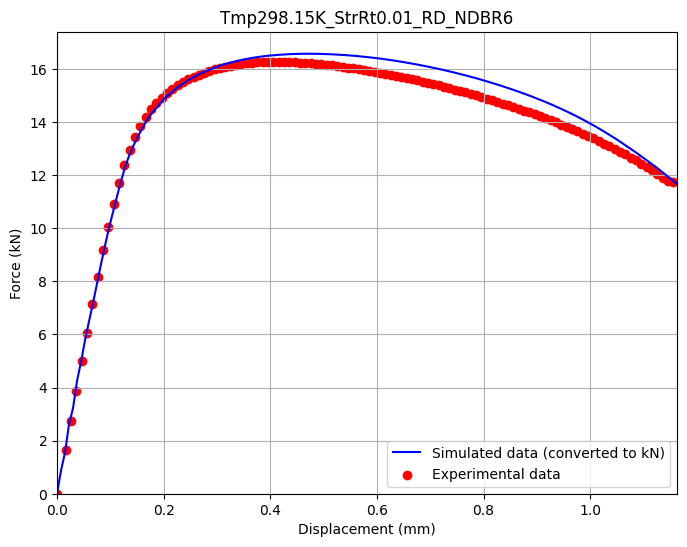

In [9]:
#Tmp298.15K_StrRt0.01
# NDBR6
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/RD_NDBR6.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/Tmp298.15K_StrRt0.01_RD_NDBR6.xlsx", "Tmp298.15K_StrRt0.01_RD_NDBR6")

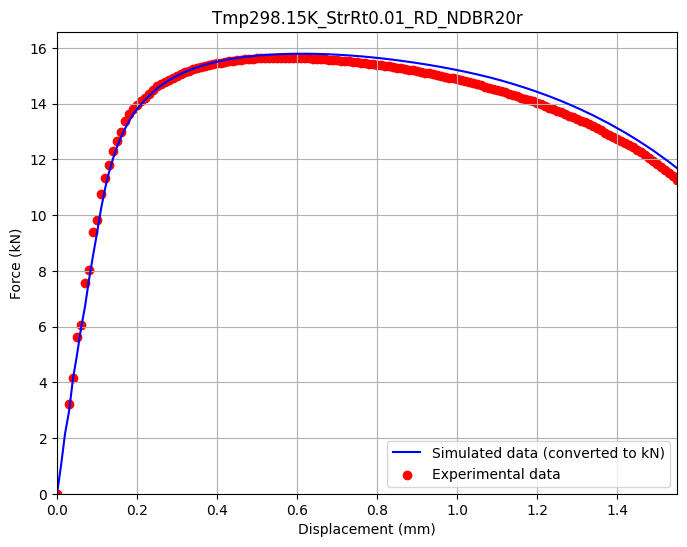

In [10]:
#Tmp298.15K_StrRt0.01
# NDBR20
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/RD_NDBR20r.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/Tmp298.15K_StrRt0.01_RD_NDBR20.xlsx", "Tmp298.15K_StrRt0.01_RD_NDBR20r")

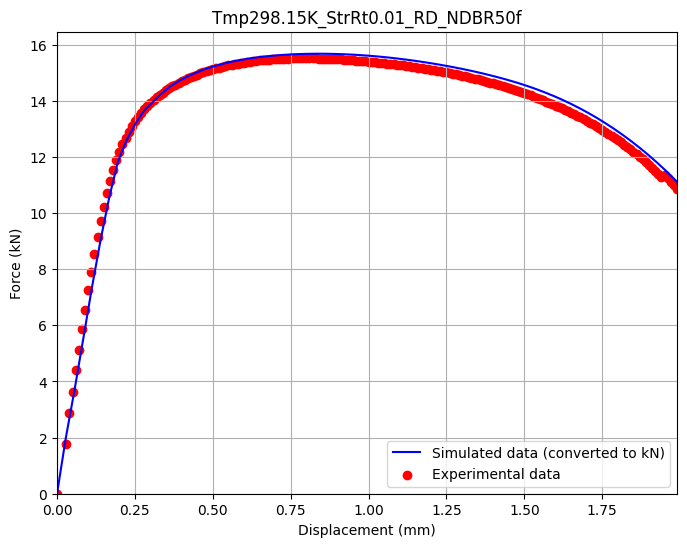

In [11]:
#Tmp298.15K_StrRt0.01
# NDBR50
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/RD_NDBR50f.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/Tmp298.15K_StrRt0.01_RD_NDBR50.xlsx", "Tmp298.15K_StrRt0.01_RD_NDBR50f")

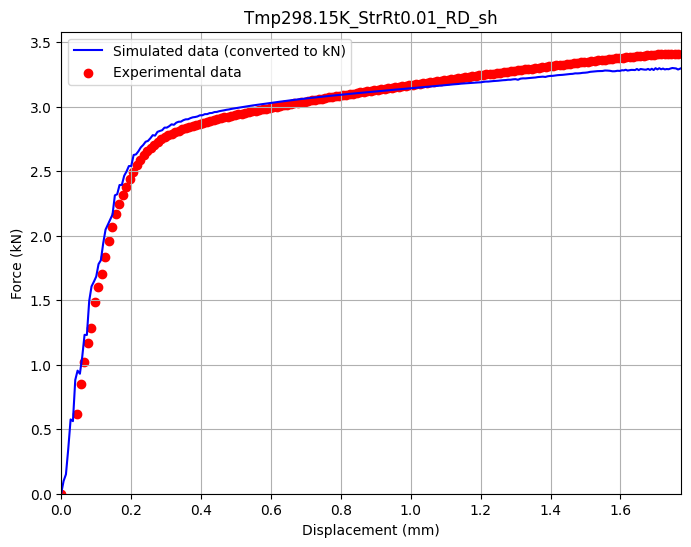

In [12]:
#Tmp298.15K_StrRt0.01
# SH
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/RD_sh.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.01_RD/Tmp298.15K_StrRt0.01_RD_SH.xlsx", "Tmp298.15K_StrRt0.01_RD_sh")

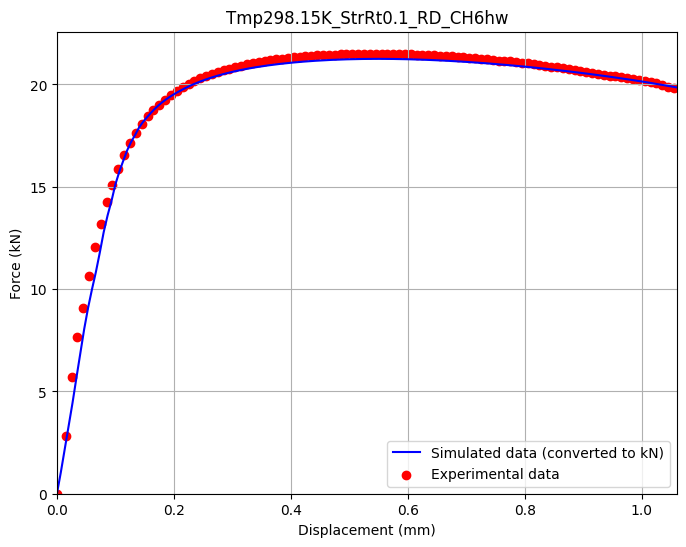

In [15]:
#Tmp298.15K_StrRt0.01
# CHD6

compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/RD_CH6hw.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/Tmp298.15K_StrRt0.1_RD_CHD6.xlsx", "Tmp298.15K_StrRt0.1_RD_CH6hw")

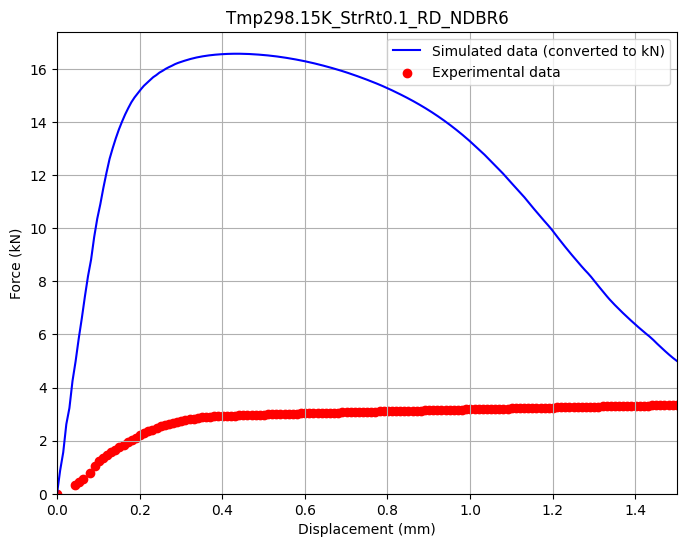

In [17]:
#Tmp298.15K_StrRt0.01
# NDBR6

compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/RD_NDBR6.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/Tmp298.15K_StrRt0.1_RD_NDBR6.xlsx", "Tmp298.15K_StrRt0.1_RD_NDBR6")

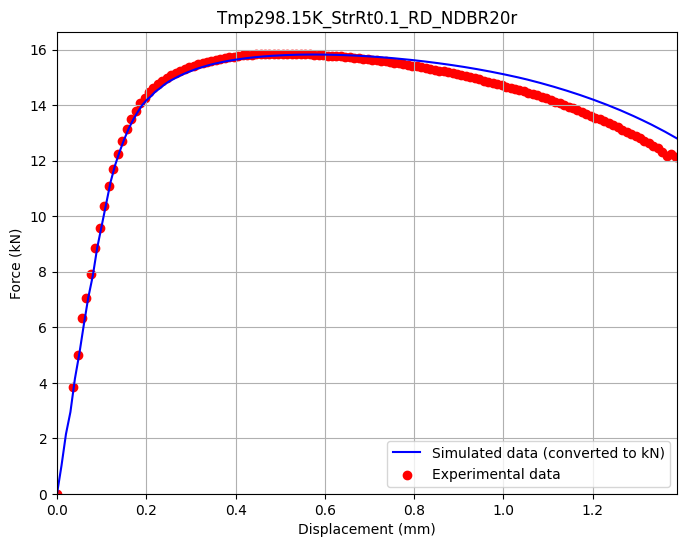

In [18]:
#Tmp298.15K_StrRt0.01
# NDBR20

compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/RD_NDBR20r.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/Tmp298.15K_StrRt0.1_RD_NDBR20.xlsx", "Tmp298.15K_StrRt0.1_RD_NDBR20r")

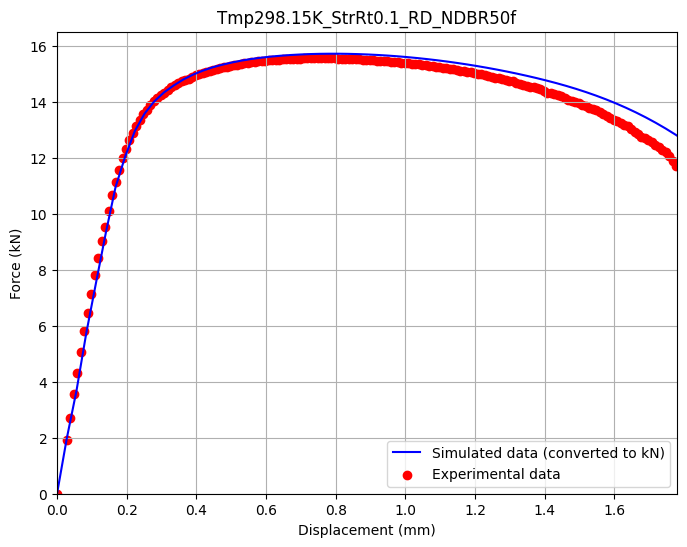

In [19]:
#Tmp298.15K_StrRt0.01
# NDBR50

compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/RD_NDBR50f.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/Tmp298.15K_StrRt0.1_RD_NDBR50.xlsx", "Tmp298.15K_StrRt0.1_RD_NDBR50f")

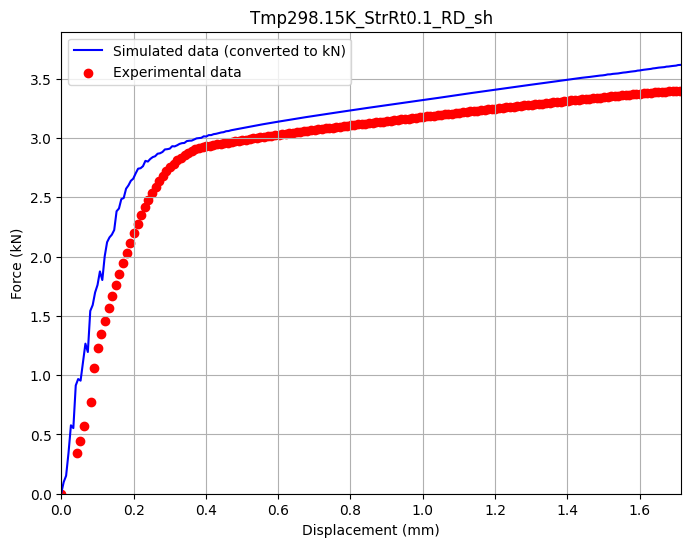

In [20]:
#Tmp298.15K_StrRt0.01
# NDBR20

compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/RD_sh.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp298.15K_StrRt0.1_RD/Tmp298.15K_StrRt0.1_RD_SH.xlsx", "Tmp298.15K_StrRt0.1_RD_sh")

In [ ]:
# CH6
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/RD_CH6hw.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/Tmp373.15K_StrRt0.0001_RD_CH6D.xlsx", "Tmp373.15K_StrRt0.0001_RD_CH6hw")

# NDBR50
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/RD_NDBR50f.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/Tmp373.15K_StrRt0.0001_RD_NDBR50.xlsx", "Tmp373.15K_StrRt0.0001_RD_NDBR50"f)

# NDBR6
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/RD_NDBR6.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/Tmp373.15K_StrRt0.0001_RD_NDBR6.xlsx", "Tmp373.15K_StrRt0.0001_RD_NDBR6")

# NDBR20
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/RD_NDBR20r.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/Tmp373.15K_StrRt0.0001_RD_NDBR20.xlsx", "Tmp373.15K_StrRt0.0001_RD_NDBR20r")

# SH
compare_curve("C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/RD_sh.txt", "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/plot/Tmp373.15K_StrRt0.0001_RD/Tmp373.15K_StrRt0.0001_RD_SH.xlsx", "Tmp373.15K_StrRt0.0001_RD_SH")